In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

In [2]:
def generate_random_points(polygon, num_points):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    while len(points) < num_points:
        random_point = Point([np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)])
        if polygon.contains(random_point):
            points.append(random_point)
    return points

Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID', 'POP_21', 'Avg_Pop',
       'pop_index', 'total', 'perc_total', 'POP_new', 'geometry'],
      dtype='object')
EPSG:4326


<Axes: >

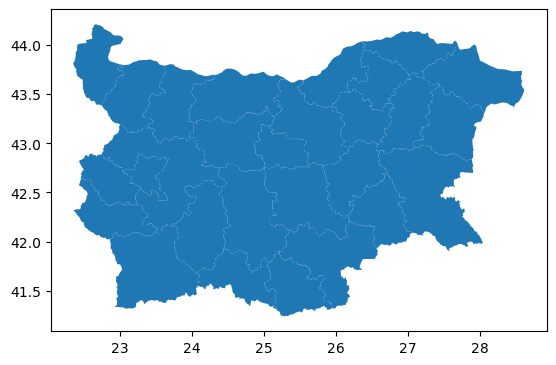

In [3]:
# Path to the shapefile
shapefile_path = '/home/nitro5/Desktop/data/GIS/1st_semester/tutor/Sarafova/project/Regions_BG/Regions_BG.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(gdf.columns)

# Print the CRS (Coordinate Reference System)
print(gdf.crs)

# Plot the shapefile
gdf.plot()

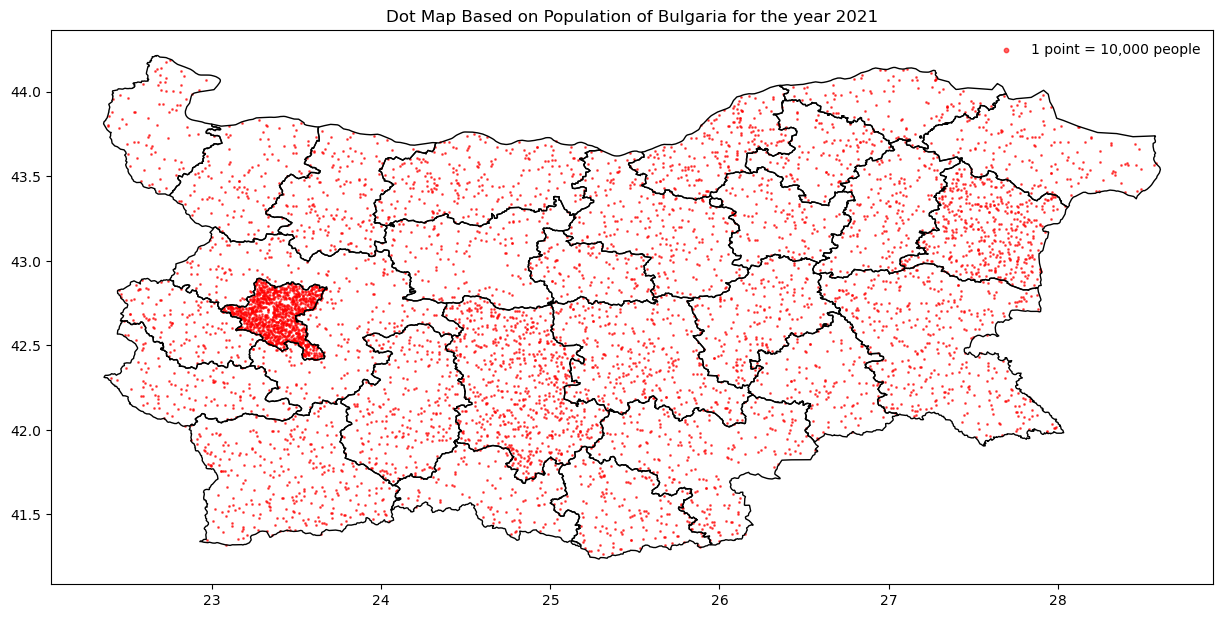

In [14]:
population_column = 'POP_21'

# Scaling factor to reduce the number of points
scaling_factor = 1000

# Generate points based on population and print the number of points per polygon
all_points = []
polygon_points_count = []

for idx, row in gdf.iterrows():
    polygon = row['geometry']
    population = row[population_column]
    num_points = int(population / scaling_factor)
    polygon_points_count.append((idx, num_points))
    #print(f"Polygon {idx} will have {num_points} points.")
    if num_points > 0:
        all_points.extend(generate_random_points(polygon, num_points))

# Create a GeoDataFrame from the points
points_gdf = gpd.GeoDataFrame(geometry=all_points)

# Adjust the figure size
plt.figure(figsize=(15, 15))

# Plot the original polygons
gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor='black')

# Plot the random points
points_gdf.plot(ax=plt.gca(), markersize=1, color='red', alpha=0.6)

plt.scatter([], [], color='red', alpha=0.6, s=10, label='1 point = 10,000 people')
plt.legend(scatterpoints=1, frameon=False, loc='upper right')

# Show the plot
plt.title('Dot Map Based on Population of Bulgaria for the year 2021')
plt.show()

In [13]:
for idx, row in gdf.iterrows():
    polygon = row['geometry']
    population = row[population_column]
    num_points = int(population / scaling_factor)
    print(f"Polygon {row['NUTS_NAME']} will have {num_points} points.")

Polygon София will have 231 points.
Polygon Бургас will have 380 points.
Polygon Добрич will have 150 points.
Polygon Шумен will have 151 points.
Polygon Ловеч will have 116 points.
Polygon Велико Търново will have 207 points.
Polygon Плевен will have 226 points.
Polygon Варна will have 432 points.
Polygon Видин will have 75 points.
Polygon Монтана will have 119 points.
Polygon Търговище will have 98 points.
Polygon Враца will have 152 points.
Polygon Благоевград will have 292 points.
Polygon Перник will have 114 points.
Polygon Пловдив will have 634 points.
Polygon Кюстендил will have 111 points.
Polygon Кърджали will have 141 points.
Polygon Габрово will have 98 points.
Polygon Стара Загора will have 296 points.
Polygon София (столица) will have 1274 points.
Polygon Разград will have 103 points.
Polygon Пазарджик will have 229 points.
Polygon Смолян will have 96 points.
Polygon Силистра will have 97 points.
Polygon Хасково will have 211 points.
Polygon Сливен will have 172 points.
Po

In [15]:
output_path = '/home/nitro5/Desktop/data/GIS/1st_semester/tutor/Sarafova/project/Regions_BG/Regions_BG_dot_file.gpkg'
points_gdf.to_file(output_path, layer='Regions_BG_dot_map', driver='GPKG')